In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, parser='auto')
mnist.target = mnist.target.astype(np.int8)

In [4]:
type(mnist)

sklearn.utils._bunch.Bunch

In [5]:
df = pd.DataFrame(data = np.c_[mnist["data"], mnist["target"]], columns = mnist["feature_names"] + ['target']) 

In [6]:
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to target
dtypes: int64(785)
memory usage: 419.2 MB


In [8]:
df.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0,4.452429
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0,2.890195
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0,9.000000


In [11]:
X, y = mnist["data"], mnist["target"]

In [12]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: int8

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56000 entries, 59834 to 28516
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 335.4 MB


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf=RandomForestClassifier(n_estimators = 10, max_depth = 5)

In [34]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [35]:
rf.score(X_train,y_train), rf.score(X_test,y_test)

(0.8106964285714285, 0.8025714285714286)

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [106]:
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
cov_mat = np.cov(X_train_scaled.T)
cov_mat.shape

(784, 784)

In [107]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
eigen_vals.shape

(784,)

In [108]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
len(var_exp)

784

In [109]:
cum_var_exp = np.cumsum(var_exp)
len(cum_var_exp)

784

In [110]:
import matplotlib.pyplot as plt

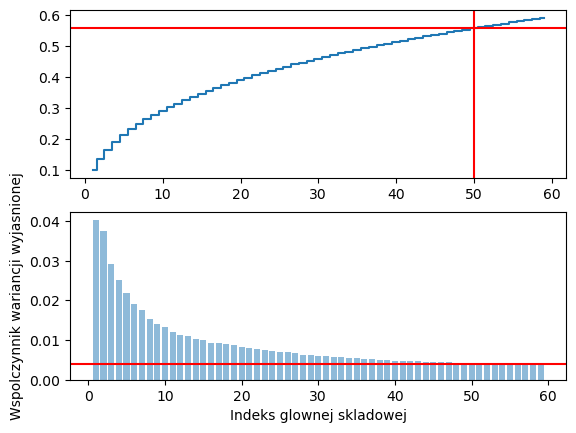

In [119]:
plt.subplot(211)
plt.step(range(1, 60), cum_var_exp[1:60], where="mid")
plt.axvline(50,color='red')
plt.axhline(cum_var_exp[50],color='red')
plt.subplot(212)
plt.bar(range(1, 60), var_exp[1:60], alpha=0.5, align="center")
plt.axhline(var_exp[50],color='red')
plt.xlabel("Indeks glownej skladowej")
plt.ylabel("Wspolczynnik wariancji wyjasnionej")
plt.show()

In [120]:
var_exp[50],cum_var_exp[50]

(0.0040934682220099055, 0.5566711246561403)

Przy redukcji do 50 wymiarów odcięcie jest dla wartości ok. 0,004, 50 wymiarów odpowaiada za ok. 55,7% wariancji wyjaśnionej.

In [121]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
w = np.concatenate([eigen_pairs[i][1][:, np.newaxis] for i in range(50)],axis=1)
w[500]

array([-0.03677504, -0.02414623, -0.0300785 , -0.04032493, -0.03864863,
       -0.01149737,  0.059778  , -0.01461739, -0.01830262, -0.01859174,
        0.071559  ,  0.03171783, -0.00503722,  0.02903227, -0.05659735,
        0.04827217,  0.10233327, -0.01088535,  0.03702486,  0.0080159 ,
        0.12631224,  0.01275185, -0.04981569, -0.02429505,  0.01313889,
       -0.04293834, -0.00028016,  0.0481423 ,  0.0579978 , -0.01834548,
        0.04800744, -0.02267453,  0.03933506, -0.05592432, -0.05428017,
        0.01040255, -0.01852118, -0.01731792, -0.04551988,  0.04383864,
       -0.01595499,  0.03929475, -0.02233085, -0.01833686,  0.06862673,
        0.00506923,  0.02487079,  0.02701103,  0.00576399, -0.02030067])

In [122]:
len(w[500])

50

In [143]:
from sklearn.base import BaseEstimator,TransformerMixin

In [154]:
class PCA(BaseEstimator,TransformerMixin):
    
    def __init__(self, do_transform=True):
        self.trans = do_transform
    
    def fit(self, X, y=None):
        return self

    def transform(self, X_train_scaled):
        cov_mat = np.cov(X_train_scaled.T)
        eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
        tot = sum(eigen_vals)
        var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
        cum_var_exp = np.cumsum(var_exp)
        eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
        eigen_pairs.sort(key=lambda k: k[0], reverse=True)
        w = np.concatenate([eigen_pairs[i][1][:, np.newaxis] for i in range(50)],axis=1)
        out=X_train_scaled.dot(w)
        if self.trans:
            return out

In [155]:
pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA())
])
type(X_train)

pandas.core.frame.DataFrame

In [160]:
X_train_pca=pipeline.fit_transform(X_train)
X_train_pca.shape

(56000, 50)

In [170]:
X_train_pca[500]

array([-5.73975764,  6.10134326, -1.58573789, -9.52351946,  1.35286484,
       -3.31981299, -5.86625693,  2.84847466,  7.3029536 ,  1.16025045,
       -1.6646333 , -0.9621961 , -2.37185764,  0.85559175,  0.40453594,
       -2.11167672, -2.09184181, -0.96735791, -1.65734252, -2.33249682,
        1.91726819,  0.2840196 ,  0.43483861, -3.35816362,  0.8514125 ,
       -3.08123042, -1.68337833,  0.55958958, -2.2358217 , -1.04106343,
        0.93078545,  3.10912647,  0.31657819,  1.72292929, -2.82827033,
        0.63909841,  1.62811661,  6.65357985,  1.48806058, -1.13267051,
        1.2695079 , -1.79560995, -0.76377643, -0.85650976,  2.37486922,
        0.52680259, -5.49299391,  0.44015662,  0.69402035,  0.46724682])

In [168]:
X_test_pca=pipeline.fit_transform(X_test)
X_test_pca.shape

(14000, 50)

In [163]:
x_train_pca.size/X_train.size

0.06377551020408163

In [161]:
rf2=RandomForestClassifier(n_estimators = 10, max_depth = 5)

In [164]:
rf2.fit(X_train_pca,y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [165]:
rf.score(X_train,y_train), rf.score(X_test,y_test)

(0.8106964285714285, 0.8025714285714286)

In [169]:
rf2.score(X_train_pca,y_train), rf2.score(X_test_pca,y_test)

(0.7755714285714286, 0.332)